In [29]:
import pandas as pd
import numpy as np

In [30]:
# reading data
df=pd.read_csv("monthly-car-sales.csv",parse_dates=['Month'],index_col=['Month'])
df.head()

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


In [31]:
df.dtypes

Sales    int64
dtype: object

In [32]:
df.tail()

,Sales
Month,
1968-08-01,16722
1968-09-01,14385
1968-10-01,21342
1968-11-01,17180
1968-12-01,14577


In [33]:
df.shape

(108, 1)

In [34]:
df.isnull().sum()

Sales    0
dtype: int64

In [35]:
df.dtypes

Sales    int64
dtype: object

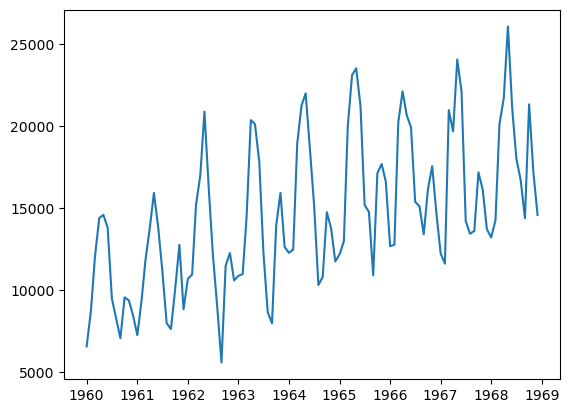

In [36]:
import matplotlib.pyplot as plt
plt.plot(df)

In [37]:
from statsmodels.tsa.stattools import adfuller

In [38]:
# Checking for Stationary
result=adfuller(df['Sales'],autolag='AIC')

print("p-value :", result[1])
# data is unstable

p-value : 0.6632691049832871


In [39]:
# Applying Differencing
df['Sales_diff']=df['Sales']-df['Sales'].shift(12)
df.head(15)

,Sales,Sales_diff
Month,,
1960-01-01,6550,NaN
1960-02-01,8728,NaN
1960-03-01,12026,NaN
1960-04-01,14395,NaN
1960-05-01,14587,NaN
1960-06-01,13791,NaN
1960-07-01,9498,NaN
1960-08-01,8251,NaN
1960-09-01,7049,NaN


In [11]:
df.dropna(subset=['Sales_diff'],inplace=True)

In [12]:
df.head()

,Sales,Sales_diff
Month,,
1961-01-01,7237,687.0
1961-02-01,9374,646.0
1961-03-01,11837,-189.0
1961-04-01,13784,-611.0
1961-05-01,15926,1339.0


In [13]:
result=adfuller(df['Sales_diff'],autolag='AIC')

print("p-value :", result[1])

p-value : 0.004966833586579766


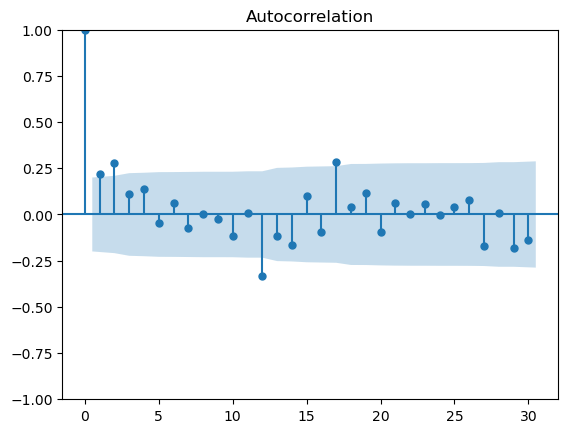

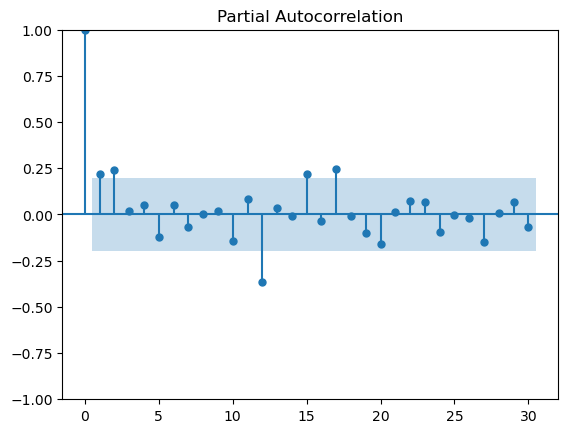

In [14]:
# Plotting acf and pacf graph
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

acf=plot_acf(df['Sales_diff'],lags=30)
pacf=plot_pacf(df['Sales_diff'],lags=30)

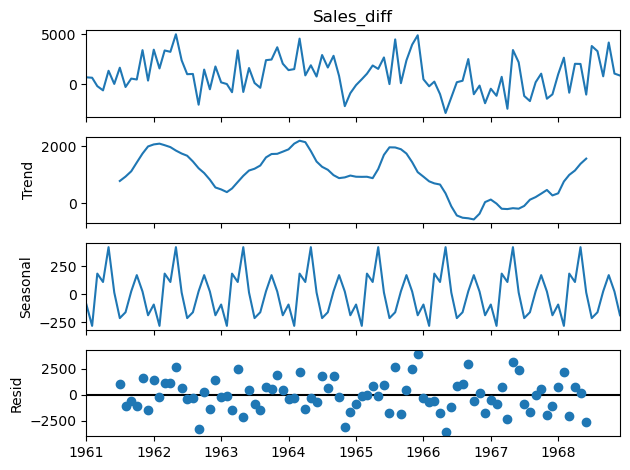

In [18]:
# Applying Seasonal Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

decompose=seasonal_decompose(df['Sales_diff'],model='Additive')
decompose.plot()

plt.show()

In [20]:
adf_test=adfuller(df['Sales_diff'])
print("P-value :", adf_test[1])

P-value : 0.004966833586579766


In [23]:
# Applying ARIMA model

from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

train,test=train_test_split(df['Sales_diff'],test_size=0.2,shuffle=False)

model=ARIMA(train,order=(0,1,0))
model_fit=model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Sales_diff   No. Observations:                   76
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -678.799
Date:                Mon, 07 Apr 2025   AIC                           1359.598
Time:                        22:59:15   BIC                           1361.915
Sample:                    01-01-1961   HQIC                          1360.523
                         - 04-01-1967                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.198e+06   8.04e+05      5.220      0.000    2.62e+06    5.77e+06
Ljung-Box (L1) (Q):                  25.42   Jarque-Bera (JB):                 1.34
Prob(Q):                              0.00   Pr

C:\Users\yasha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\yasha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\yasha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


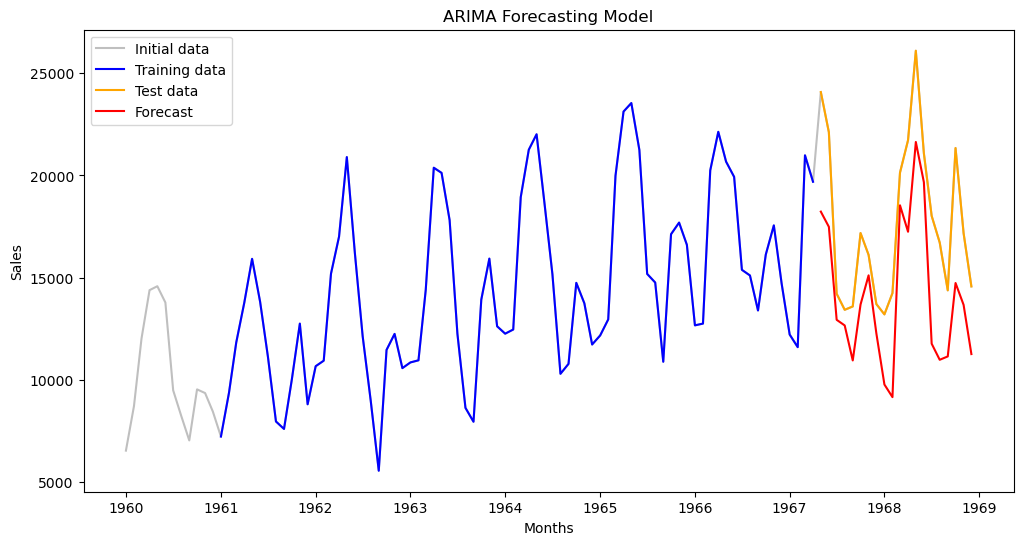

Forecast for the test data (in the initial scale):
1967-05-01    18234.0
1967-06-01    17490.0
1967-07-01    12945.0
1967-08-01    12670.0
1967-09-01    10958.0
1967-10-01    13692.0
1967-11-01    15119.0
1967-12-01    12277.0
1968-01-01     9782.0
1968-02-01     9165.0
1968-03-01    18542.0
1968-04-01    17249.0
1968-05-01    21638.0
1968-06-01    19671.0
1968-07-01    11777.0
1968-08-01    10991.0
1968-09-01    11155.0
1968-10-01    14744.0
1968-11-01    13676.0
1968-12-01    11270.0
Freq: MS, dtype: float64


In [45]:
# Forecasting
forecast=model_fit.forecast(steps=len(test))

forecast_original=forecast+df['Sales'].shift(12).loc[test.index]

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Initial data', color='gray', alpha=0.5)
plt.plot(train.index, df['Sales'].loc[train.index], label='Training data', color='blue')
plt.plot(test.index, df['Sales'].loc[test.index], label='Test data', color='orange')
plt.plot(forecast.index, forecast_original, label='Forecast', color='red')
plt.title('ARIMA Forecasting Model')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.legend()
plt.show()

print('Forecast for the test data (in the initial scale):')
print(forecast_original)